## Obiettivi dell'analisi dati

La nostra idea è quella di analizzare i dati che ci sono stati forniti per capire che tipo di impatto sociale un licenziamento o un'assunzione possono avere per i soggetti di età superiore ai 40 anni. 

Come obiettivo secondario, useremo i dati per capire quali tipi di contratti sono i più diffusi in Lombardia e quali potrebbero essere in futuro

La nostra analisi si concentrerà in un lasso di tempo 5 anni e dunque andremo a considerare tutti gli eventi di Attivazione o Terminazione di un contratto di lavoro dal 2017 al 2022.

### Importazione e lettura

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df_attivati = pd.read_csv("/Users/mac-josh/Desktop/DataScience/Esame_Laboratorio_1/RapportiAttivati.csv")
df_cessati = pd.read_csv("/Users/mac-josh/Desktop/DataScience/Esame_Laboratorio_1/RapportiCessati.csv")

__-->__ Al fine di unire i due dataset era necessario introdurre una colonna discriminante per capire quali dati facessero riferimento a quale dataset

__1__ Abbiamo aggiunto la colonna modalita con il seguente significato: 

__-->__ 1 per contratto attivato

__-->__ 0 per contratto cessato

In [4]:
df_attivati["MODALITA"] = 1
df_cessati["MODALITA"] = 0
frames = [df_attivati, df_cessati]

df_globale = pd.concat(frames)

### Prima fase di studio

In questa sezione siamo andati ad analizzare i dati per capire la distribuzione di alcune caratteristiche dei dati, attraverso:

__1__ Calcolo della media dell'età 

__2__ Calcolo della distribuzione di genere

Entrambe le operazioni verrannno svolte tenendo in considerazione entrambe le modalità dei dataset (Contratti cessati e attivati)

In [5]:
## Calcolo dell'età media per i contratti attivati
print("Età media contratti attivati: {}".format(df_globale[df_globale["MODALITA"] == 1]["ETA"].mean()))

Età media contratti attivati: 35.301741457070996


In [6]:
## Calcolo dell'età media per i contratti cessati
print("Età media contratti cessati: {}".format(df_globale[df_globale["MODALITA"] == 0]["ETA"].mean()))

Età media contratti cessati: 38.11410345983342


In [7]:
## Calcolo dell'età media globale
print("Età media globale: {}".format(df_globale["ETA"].mean()))

Età media globale: 36.09162253396619


Possiamo da subito notare che l'età media dei licenziamenti è leggermente superiore rispetto all'età media delle assunzioni. Questo potrebbe essere dovuto alla quantità di dati presenti nel dataset dei cotratti cessati (in quantità minore rispetto alle informazioni dei contratti attivati); oppure, questa differenza potrebbe intuitivamente già rivelare un trend: in lombardia ci sono molti licenziamenti di soggetti con un età più elevata rispetto alle assunzioni

Text(0, 0.5, 'Genere')

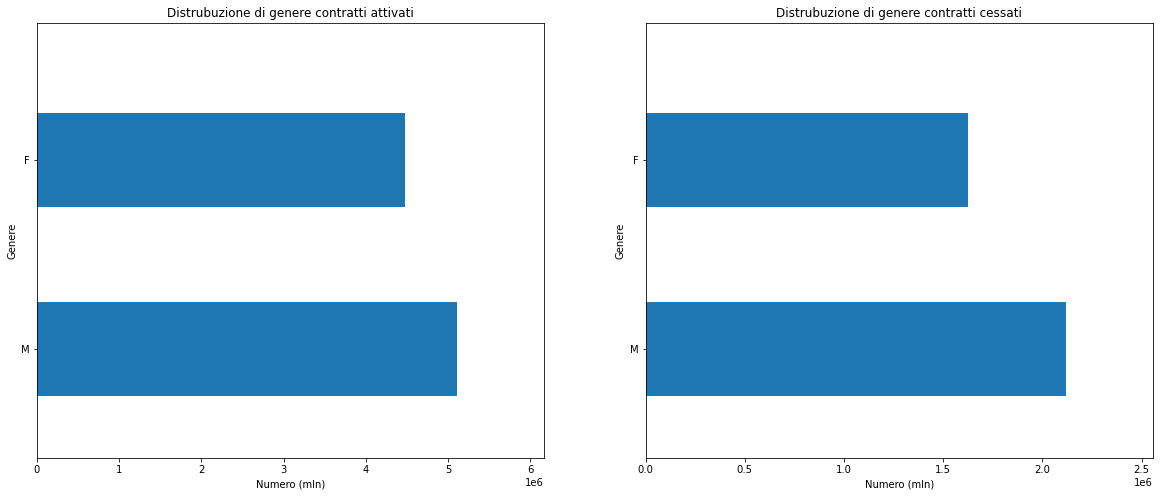

In [8]:
scale_factor = 1.15

fig = plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title("Distrubuzione di genere contratti attivati")
df_globale[df_globale["MODALITA"] == 1]["GENERE"].value_counts().plot(kind="barh")
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
plt.xlim(xmin * scale_factor, xmax * scale_factor)
plt.ylim(ymin * scale_factor, ymax * scale_factor)
plt.xlabel("Numero (mln)")
plt.ylabel("Genere")

plt.subplot(1,2,2)
plt.title("Distrubuzione di genere contratti cessati")
df_globale[df_globale["MODALITA"] == 0]["GENERE"].value_counts().plot(kind="barh")
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
plt.xlim(xmin * scale_factor, xmax * scale_factor)
plt.ylim(ymin * scale_factor, ymax * scale_factor)
plt.xlabel("Numero (mln)")
plt.ylabel("Genere")

## Analisi valori (nulli e outliers)

__-->__ Abbiamo introdotto un grafico (per ogni dataset) per capire quanti e quali valori nulli sono presenti nel dataset

__-->__ La nostra scelta è stata quella di non considerare le righe che al loro interno presentano dei valori nulli in quanto rappresentano una percenutale ridotta del totale dei record; ma prima di eliminarle dal dataset però è necessario capire se le righe con valori nulli sono relativi ad una particolare classe di persone (in modo da evitare di introdurre bias all'interno delle analisi)

<AxesSubplot:>

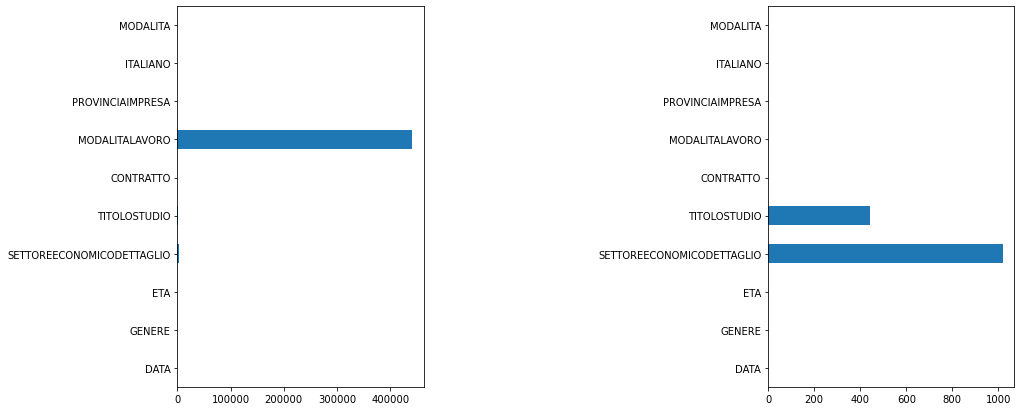

In [9]:
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
null_values_attivati = df_globale[df_globale["MODALITA"] == 1].isnull().sum()
null_values_attivati.plot.barh()

plt.subplot(1,3,3)
null_values_cessati = df_globale[df_globale["MODALITA"] == 0].isnull().sum()
null_values_cessati.plot.barh()

### Prime impressioni

__-->__ Dal primo grafico si può dedurre che più di 400k record del dataset non sono valorizzati per quanto riguarda la "Modalità di lavoro". Anche il "dettaglio del settore economico" risulta composto, seppure in maniera minima, da valori nulli per il dataset dei contratti attivati

__-->__ Per quanto riguarda invece il secondo sono poco più di un migliaio i dati, relativi al dettaglio del settore economico, che sono mancanti; anche per i titoli di studio abbiamo valori mancanti, ma in numero molto ridotto.

### Approfondimento

__-->__ Per confermare (o smentire) che gli unici valori nulli erano relativi solo a quelle due colonne abbiamo anche visualizzato i dati in maniera più grezza

__-->__ Capiamo che solo dal primo grafico (per via della scala) potevamo perderci alcune righe con valori nulli (titolo di studio).

__-->__ Il secondo invece è bastato per capire che i dati nulli fossero relativi solo al dettaglio del settore economico e al titolo di studio


In [13]:
print(null_values_attivati)
print("**********************************")
print(null_values_cessati)

DATA                              0
GENERE                            0
ETA                               0
SETTOREECONOMICODETTAGLIO      2888
TITOLOSTUDIO                    580
CONTRATTO                         0
MODALITALAVORO               440779
PROVINCIAIMPRESA                  0
ITALIANO                          0
MODALITA                          0
dtype: int64
**********************************
DATA                            0
GENERE                          0
ETA                             0
SETTOREECONOMICODETTAGLIO    1019
TITOLOSTUDIO                  440
CONTRATTO                       0
MODALITALAVORO                  0
PROVINCIAIMPRESA                0
ITALIANO                        0
MODALITA                        0
dtype: int64


__-->__ Per capire se eliminando le righe con valori nulli avremmo potuto introdurre un "bias" all'interno del dataset abbiamo eseguito le seguenti analisi:

__1:__ Verifica su genere 

__2:__ Verifica su eta

Per entrambe le modalita di contratto (attivato e cessato)

Text(0.5, 1.0, 'DIstribuzione del genere per i valori nulli')

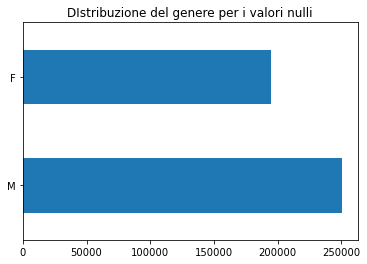

In [14]:
df_globale[df_globale.isna().any(axis=1)]["GENERE"].value_counts().plot.barh()
plt.title("DIstribuzione del genere per i valori nulli")

In [15]:
print("Eta media per i valori nulli {}".format(df_globale[df_globale.isna().any(axis=1)]["ETA"].mean()))

Eta media per i valori nulli 33.20291065706478


__-->__ Per scrupolo siamo andati a verifcare che non ci fossero valori poco sensati all'interno del dataset

Abbiamo determinato la presenza di un valore poco significativo riguardante l'età e siamo dunque andati a rimuoverlo, però ci siamo poi accorti che abbiamo molti dati di persone con età superiore a 100 anni. Seppur possibile che queste persone possano aver avuto un contratto attivato o cessato, abbiamo deciso che tutti i record di soggetti con età superiore a 100 anni sarebbero stati rimossi

In [16]:
## Seleziona gli indici dei record con età maggiore di 99
indexNames = df_globale[ df_globale["ETA"] > 99 ].index

## Elimina i record in base agli indici
df_globale.drop(indexNames , inplace=True)

In [17]:
## Verifica che funzioni 
print("Età massima dopo la rimozione dei valori poco significativi: {}".format(df_globale["ETA"].max()))

Età massima dopo la rimozione dei valori poco significativi: 99


### Risultati analisi valori (nulli e outliers)

Eliminando le righe che presentano valori nulli (e considerando gli elementi più rilevanti) non si dovrebbero creare dei bias all'interno del dataset perchè:

__1__ Per quanto riguarda il genere, la distribuzione è simile a quella globale (gli uomini sono un numero maggiore rispetto alle donne)

__2__ Riguardo l'età media, vediamo che non si discosta troppo dalla media globale del dataset (38 anni)

__3__ I valori (secondo noi) poco significativi sono stati rimossi (eta > 99 anni)

# Pulizia e trasformazione del dataset

__-->__ Abbiamo notato che la colonna chiamata "Italiano" era relativa in realta alla nazionalita del soggetto considerato e abbiamo deciso di rinominarla (anche se per il momento non ci serve)

In [18]:
## Rename della colonna ITALIANO
df_globale.rename(columns = {"ITALIANO":"NAZIONALITA"}, inplace = True)

In [19]:
## Rimozione dei valori nulli studiati in precedenza
df_globale.dropna(inplace=True)
df_globale

,DATA,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,NAZIONALITA,MODALITA
0,09/05/2020,F,60,Attività di famiglie e convivenze come datori ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PIENO,BERGAMO,UCRAINA,1
1,12/07/2019,M,43,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA,1
2,05/06/2013,F,20,Fabbricazione di altre apparecchiature elettri...,LICENZA MEDIA,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA,1
3,12/03/2010,F,28,Alberghi,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO INTERMITTENTE A TEMPO DETERMINATO,NON DEFINITO,BERGAMO,ITALIA,1
4,06/04/2021,F,49,Rifugi di montagna,LICENZA MEDIA,LAVORO INTERMITTENTE,NON DEFINITO,BERGAMO,ITALIA,1
...,...,...,...,...,...,...,...,...,...,...
3741389,05/11/2018,M,19,Fabbricazione di altri elementi in legno e di ...,TITOLO DI ISTRUZIONE SECONDARIA SUPERIORE (SCO...,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BRESCIA,ITALIA,0
3741390,09/04/2017,M,67,Altra istruzione secondaria di secondo grado d...,LAUREA - Vecchio o nuovo ordinamento,LAVORO A TEMPO INDETERMINATO,TEMPO PIENO,BRESCIA,ITALIA,0
3741391,08/05/2015,M,59,Costruzione di edifici residenziali e non resi...,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO INDETERMINATO,TEMPO PIENO,BERGAMO,MAROCCO,0
3741392,10/10/2016,M,26,Installazione di altre macchine ed apparecchia...,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO A TEMPO INDETERMINATO,TEMPO PIENO,BERGAMO,ITALIA,0


In [20]:
# Verifica di aver eliminato tutti i valori nulli
df_globale.isnull().sum(axis = 0)

DATA                         0
GENERE                       0
ETA                          0
SETTOREECONOMICODETTAGLIO    0
TITOLOSTUDIO                 0
CONTRATTO                    0
MODALITALAVORO               0
PROVINCIAIMPRESA             0
NAZIONALITA                  0
MODALITA                     0
dtype: int64

__-->__ Abbiamo deciso di convertire il formato della data in DateTime; questo ci permette di sfruttare le operazioni offerte da datetime

__-->__ Per il nostro studio era di interesse solo l'anno del contratto attivato. Abbiamo dunque scelto di introdurre una nuova colonna "ANNO" per preservare l'intera data, qualora in un secondo momento dovesse esserci utile

In [21]:
df_globale["DATA"] = pd.to_datetime(df_globale["DATA"])

In [22]:
df_globale["ANNO"] = pd.DatetimeIndex(df_globale['DATA']).year

In [23]:
df_globale

,DATA,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,NAZIONALITA,MODALITA,ANNO
0,2020-09-05,F,60,Attività di famiglie e convivenze come datori ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PIENO,BERGAMO,UCRAINA,1,2020
1,2019-12-07,M,43,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA,1,2019
2,2013-05-06,F,20,Fabbricazione di altre apparecchiature elettri...,LICENZA MEDIA,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA,1,2013
3,2010-12-03,F,28,Alberghi,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO INTERMITTENTE A TEMPO DETERMINATO,NON DEFINITO,BERGAMO,ITALIA,1,2010
4,2021-06-04,F,49,Rifugi di montagna,LICENZA MEDIA,LAVORO INTERMITTENTE,NON DEFINITO,BERGAMO,ITALIA,1,2021
...,...,...,...,...,...,...,...,...,...,...,...
3741389,2018-05-11,M,19,Fabbricazione di altri elementi in legno e di ...,TITOLO DI ISTRUZIONE SECONDARIA SUPERIORE (SCO...,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BRESCIA,ITALIA,0,2018
3741390,2017-09-04,M,67,Altra istruzione secondaria di secondo grado d...,LAUREA - Vecchio o nuovo ordinamento,LAVORO A TEMPO INDETERMINATO,TEMPO PIENO,BRESCIA,ITALIA,0,2017
3741391,2015-08-05,M,59,Costruzione di edifici residenziali e non resi...,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO INDETERMINATO,TEMPO PIENO,BERGAMO,MAROCCO,0,2015
3741392,2016-10-10,M,26,Installazione di altre macchine ed apparecchia...,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO A TEMPO INDETERMINATO,TEMPO PIENO,BERGAMO,ITALIA,0,2016


## Estrazione dati relativi allo scopo dell'analisi
In questa sezione andiamo ad estrarre dal dataset solo i soggetti che:

__Hanno età maggiore di 40 anni che hanno ricevuto un'attivazione del contratto dal 2017 al 2022__

__Hanno età maggiore di 40 anni che hanno ricevuto una terminazione del contratto dal 2017 al 2022__

__1:__ Dopo aver estratto solo i record inerenti al nostro studio, andremo a verificare nuovamente che i dati non presentino bias; andando a verificare la distribuzione di genere.

In [24]:
## Estrazione delle informazioni relative ai contratti attivati
df_attivati_over_40 = df_globale.loc[(df_globale["MODALITA"] == 1) & (df_globale["ETA"] > 39)]
df_attivati_over_40_after_2017 = df_attivati_over_40.loc[(df_attivati_over_40["ANNO"] > 2016)]

In [25]:
## Estrazione delle informazioni relative ai contratti terminati
df_cessati_over_40 = df_globale.loc[(df_globale["MODALITA"] == 0) & (df_globale["ETA"] > 39)]
df_cessati_over_40_after_2017 = df_cessati_over_40.loc[(df_cessati_over_40["ANNO"] > 2016)]

Text(0.5, 1.0, 'Distribuzione di genere per contratti terminati per gli over 40 dopo il 2017')

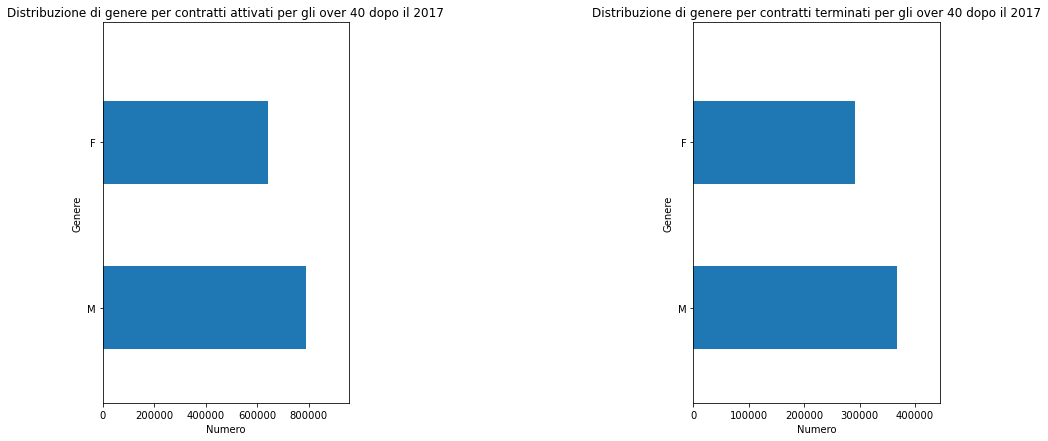

In [26]:
## Stampa i grafici relativi alla distribuzione del genere per entrambe le tipologie
scale_factor = 1.15
plt.figure(figsize=(15,7))

plt.subplot(1,3,1)
df_attivati_over_40_after_2017["GENERE"].value_counts().plot(kind='barh')
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
plt.xlim(xmin * scale_factor, xmax * scale_factor)
plt.ylim(ymin * scale_factor, ymax * scale_factor)
plt.xlabel("Numero")
plt.ylabel("Genere")
plt.title("Distribuzione di genere per contratti attivati per gli over 40 dopo il 2017")

plt.subplot(1,3,3)
df_cessati_over_40_after_2017["GENERE"].value_counts().plot(kind='barh')
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
plt.xlim(xmin * scale_factor, xmax * scale_factor)
plt.ylim(ymin * scale_factor, ymax * scale_factor)
plt.xlabel("Numero")
plt.ylabel("Genere")
plt.title("Distribuzione di genere per contratti terminati per gli over 40 dopo il 2017")

__-->__ I dati hanno una distribuzione simile a quella del dataset iniziale. Questo ci suggerisce che anche riducendo il numero di record che stiamo considerando, i dati non presentano bias per quanto riguarda il genere.

# Risultati analisi

In [27]:
titolo = "Assunzioni 2017-2022 per soggetti con età maggiore di 40 anni"

desc_lunga = "APPRENDISTATO PER LA QUALIFICA E PER IL DIPLOMA PROFESSIONALE, IL DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE E IL CERTIFICATO DI SPECIALIZZAZIONE TECNICA SUPERIORE"
desc_corta = "APPRENDISTATO PER LA QUALIFICA E PER IL DIPLOMA PROFESSIONALE"

df_attivati_over_40_after_2017 = df_attivati_over_40_after_2017.replace(desc_lunga,desc_corta)

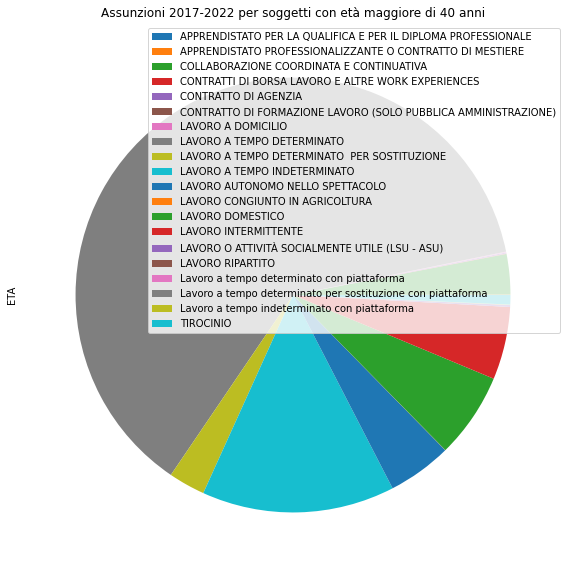

In [28]:
ax = df_attivati_over_40_after_2017.groupby(["CONTRATTO"]).count().plot(kind="pie",y="ETA",figsize=(20,10),labels=None,title=titolo)

__Questo grafico a torta rappresenta i contratti di soggeti con più di 40 anni che sono stati ATTIVATI dal 2017 ad oggi suddivisi tipologia di contratto__

Come possiamo notare, la tipolgia di contratto di lavoro più diffusp a __Tempo determinato__ e che dunque ha una scadenza.

Al secondo posto invece troviamo il contratto di lavoro a __Tempo indeterminato__ , senza scadenza

In [29]:
titolo2 = "Licenziamenti 2017-2022 per soggetti con età maggiore di 40 anni"
desc_lunga2 = "APPRENDISTATO PER LA QUALIFICA E PER IL DIPLOMA PROFESSIONALE, IL DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE E IL CERTIFICATO DI SPECIALIZZAZIONE TECNICA SUPERIORE"
desc_corta2 = "APPRENDISTATO PER LA QUALIFICA E PER IL DIPLOMA PROFESSIONALE"

df_cessati_over_40_after_2017 = df_cessati_over_40_after_2017.replace(desc_lunga2,desc_corta2)

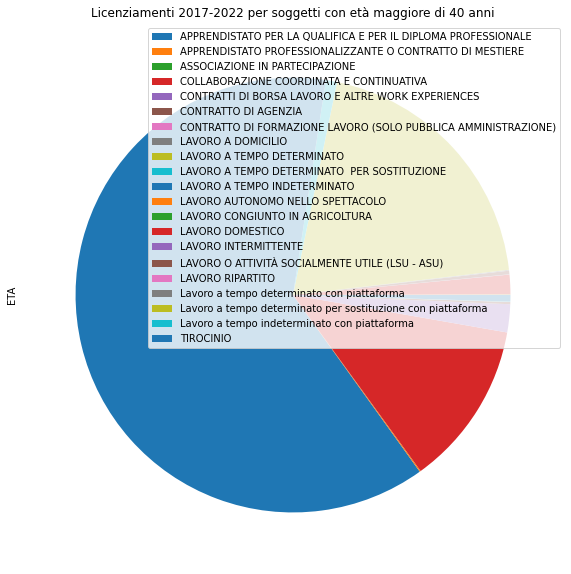

In [30]:
ax = df_cessati_over_40_after_2017.groupby(["CONTRATTO"]).count().plot(kind="pie",y="ETA",figsize=(20,10),labels=None,title=titolo2)

__Questo grafico a torta rappresenta i contratti di soggeti con più di 40 anni che sono stati TERMINATI dal 2017 ad oggi suddivisi tipologia di contratto__

Il grafico permette di capire come la maggior parte dei licenziamenti avvenuti negli ultimi 5 anni fanno riferimento a tipologie di contratto di lavoro a __Tempo indeterminato__ (quindi c'è un alto indice di precarietà over 40, in quanto si hanno molte assuzioni a tempo determinato e molti licenziamenti di soggetti con contratto a tempo indeterminato)

Al secondo posto, a differenza delle attivazioni di contratto, troviamo invece il contratto di lavoro __Domestico__

Per rendere più leggibili i risultati della nostra analisi, abbiamo deciso di rappresentare sotto forma di istogrammi i dati provenienti dai due dataset, come segue:

In [31]:
## Raggruppamento per contratto dei dati relativi ad attivazioni e terminazioni di contratto
attivazione_group = df_attivati_over_40_after_2017.groupby("CONTRATTO",as_index=False).count()
terminazione_group = df_cessati_over_40_after_2017.groupby("CONTRATTO",as_index=False).count()

In [32]:
## Creazione di un nuovo dataframe con colonne solo quelle necessarie per la rappresentazione con grafici
df = pd.DataFrame(columns=["CONTRATTO","NUMERO_ATTIVATI","NUMERO_TERMINATI"]) 

In [33]:
## Riempimento dataframe nuovo
for index in range(len(attivazione_group)):
    for index2 in range(len(terminazione_group)):
        if(attivazione_group["CONTRATTO"][index] == terminazione_group["CONTRATTO"][index2]):
            df = df.append({"CONTRATTO":attivazione_group["CONTRATTO"][index],"NUMERO_ATTIVATI":attivazione_group["ETA"][index],"NUMERO_TERMINATI":terminazione_group["ETA"][index2]},ignore_index=True)



In [34]:
## Visualizzazione grezza del dataframe costruito secondo i raggruppamenti
df

,CONTRATTO,NUMERO_ATTIVATI,NUMERO_TERMINATI
0,APPRENDISTATO PER LA QUALIFICA E PER IL DIPLOM...,6,3
1,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,510,244
2,COLLABORAZIONE COORDINATA E CONTINUATIVA,42846,9496
3,CONTRATTI DI BORSA LAVORO E ALTRE WORK EXPERIE...,467,142
4,CONTRATTO DI AGENZIA,1119,1763
5,CONTRATTO DI FORMAZIONE LAVORO (SOLO PUBBLICA ...,23,2
6,LAVORO A DOMICILIO,875,445
7,LAVORO A TEMPO DETERMINATO,892453,131217
8,LAVORO A TEMPO DETERMINATO PER SOSTITUZIONE,39011,5477
9,LAVORO A TEMPO INDETERMINATO,205408,411111


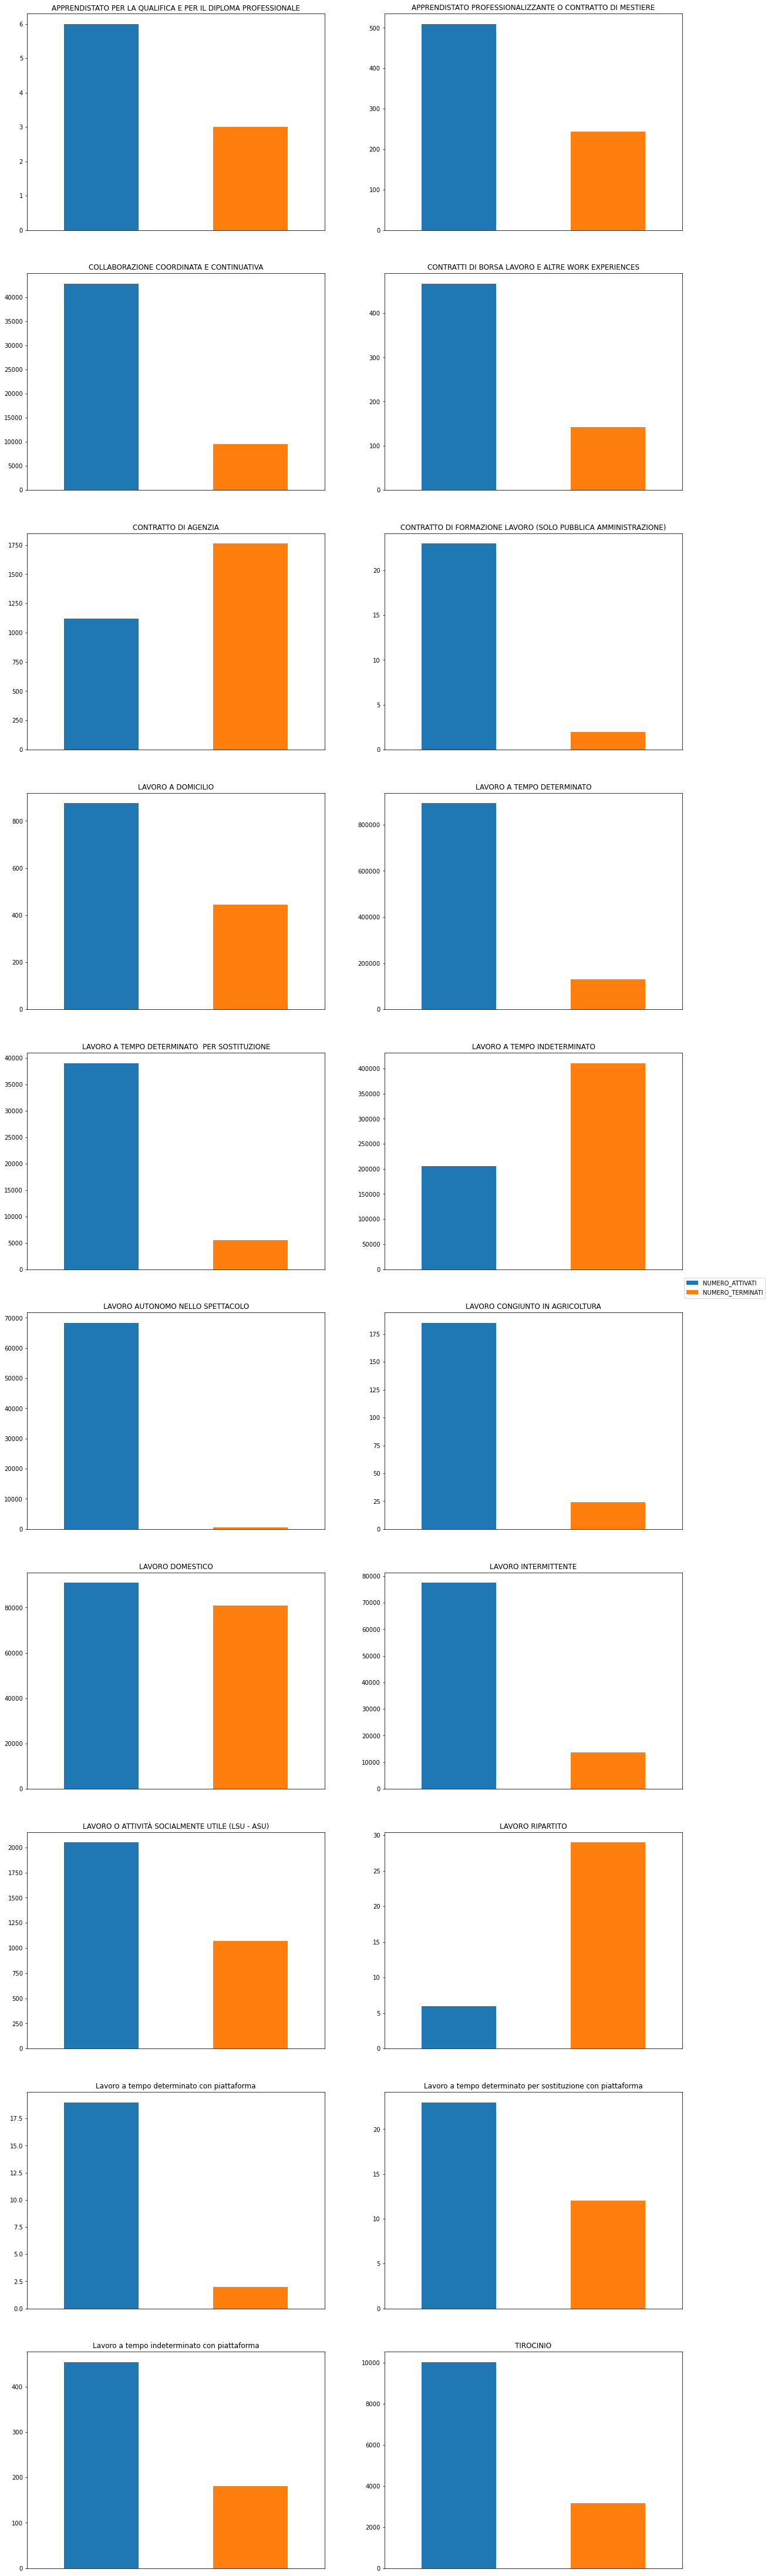

In [35]:
## Rappresentazione del dataframe sottoforma di istogrammi
df = df.set_index('CONTRATTO')
fig = plt.figure(figsize=(20,80))
for i, (name, row) in enumerate(df.iterrows()):
    ax = plt.subplot(10,2, i+1)
    ax.set_title(row.name)
    ax.get_xaxis().set_visible(False)
    df.iloc[i].plot.bar(color=['C0', 'C1'])
fig.legend(ax.bar([0,0],[0,0], color=['C0','C1']),['NUMERO_ATTIVATI','NUMERO_TERMINATI'], loc=5)

plt.show()

### Analisi dei grafici

A prima vista i grafici potrebbero suggerire che a fronte di un alto numero di assunzioni, spesso, c'è un basso numero di licenziamenti. E questo, in generale, è vero. 

Ma da un'analisi dettagliata capiamo che:

__1)__ Guardando il l'istogramma relativo ai contratti "A tempo indeterminato" possiamo vedere che i licenziamenti sono quasi il doppio rispetto alle assunzioni per lo stesso tipo di contratto.

__2)__ Dunque l'alto numero di assunzioni con contratti diversi da quello "indeterminato", ci suggerisce che a fronte di un licenziamento con questa tipologia di contratto, i soggetti vengono assunti mediante una differente formula.

Segue un'analisi da un punto di vista differente dello stesso fenomeno

### Trend per anno

In [36]:
df_attivati_over_40_after_2017.groupby("ANNO").count()

,DATA,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,NAZIONALITA,MODALITA
ANNO,,,,,,,,,,
2017,305318,305318,305318,305318,305318,305318,305318,305318,305318,305318
2018,327992,327992,327992,327992,327992,327992,327992,327992,327992,327992
2019,324848,324848,324848,324848,324848,324848,324848,324848,324848,324848
2020,245606,245606,245606,245606,245606,245606,245606,245606,245606,245606
2021,228566,228566,228566,228566,228566,228566,228566,228566,228566,228566


In [37]:
## Permette di visualizzare la percentuale solo se maggiore del 10% (stackoverflow)
def autopct(pct):
    return ('%.2f' % pct) if pct > 10 else ''

__I grafici che seguono sono per analizzare l'andamento dei licenziamenti e delle assunzioni suddivise per anno__

Le seguenti rappresentazioni ci permettono di analizzare l'andamento di assunzioni e licenziamenti negli ultimi 5 anni. Questo per capire quali fossero stati gli anni in cui il trend è stato negativo, per avere una visione più completa del dominio.  



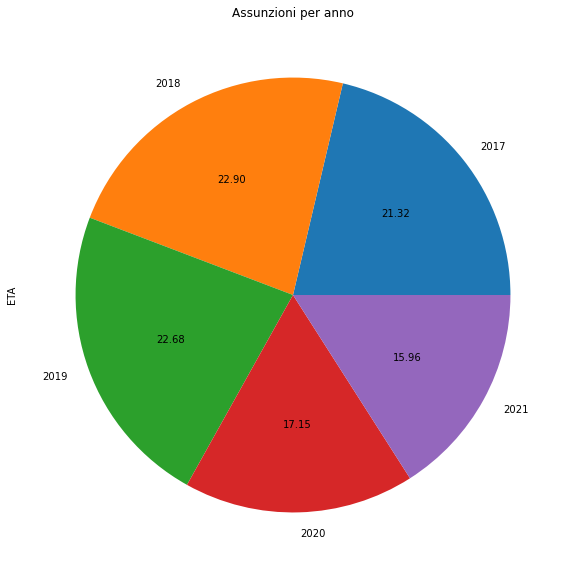

In [38]:
ax = df_attivati_over_40_after_2017.groupby(["ANNO"]).count().plot(kind="pie",y="ETA",figsize=(20,10),title="Assunzioni per anno",legend=None,autopct=autopct)

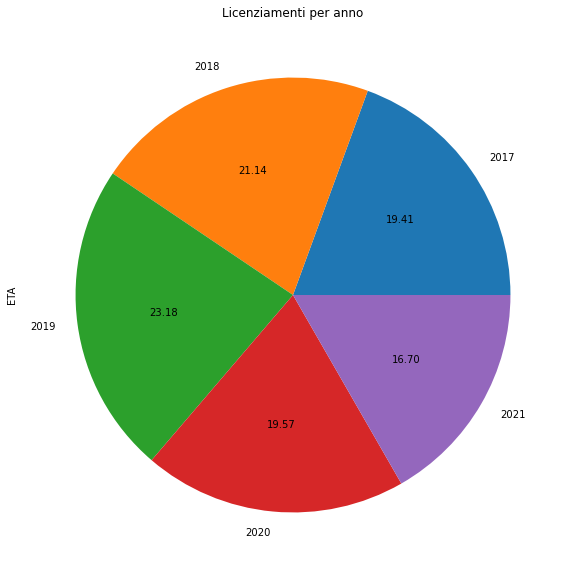

In [39]:
ay = df_cessati_over_40_after_2017.groupby(["ANNO"]).count().plot(kind="pie",y="ETA",figsize=(20,10),title="Licenziamenti per anno",legend=None,autopct=autopct)

## Analisi settori in crescita (statistica)

La seguente analisi punta a capire (a tendere) quali possibili settori potrebbero essere in crescita se andiamo a valutare i licenziamenti e le assunzioni

In [40]:
## Raggruppamento per settore economico dettaglio
attivazione_dettaglio_group = df_attivati_over_40_after_2017.groupby("SETTOREECONOMICODETTAGLIO",as_index=False).count()
terminazione_dettaglio_group = df_cessati_over_40_after_2017.groupby("SETTOREECONOMICODETTAGLIO",as_index=False).count()

In [41]:
attivazione_dettaglio_group = attivazione_dettaglio_group.sort_values("ETA",ascending=False,ignore_index=True).iloc[0:10]


In [42]:
## Creazione di un nuovo dataframe con colonne solo quelle necessarie per la rappresentazione con grafici
df_settore_ecnomico = pd.DataFrame(columns=["SETTORE","NUMERO_ATTIVATI","NUMERO_TERMINATI"]) 

In [43]:
for index in range(len(attivazione_dettaglio_group)):
    for index2 in range(len(terminazione_dettaglio_group)):
        if(attivazione_dettaglio_group["SETTOREECONOMICODETTAGLIO"][index] == terminazione_dettaglio_group["SETTOREECONOMICODETTAGLIO"][index2]):
            df_settore_ecnomico = df_settore_ecnomico.append({"SETTORE":attivazione_dettaglio_group["SETTOREECONOMICODETTAGLIO"][index],"NUMERO_ATTIVATI":attivazione_dettaglio_group["ETA"][index],"NUMERO_TERMINATI":terminazione_dettaglio_group["ETA"][index2]},ignore_index=True)

In [44]:
df_settore_ecnomico

,SETTORE,NUMERO_ATTIVATI,NUMERO_TERMINATI
0,Attività di famiglie e convivenze come datori ...,95460,81931
1,"Attività di produzione cinematografica, di vid...",83509,1242
2,Alberghi,61409,8187
3,Pulizia generale (non specializzata) di edifici,55856,31958
4,Costruzione di edifici residenziali e non resi...,52098,31412
5,Ristorazione con somministrazione,47850,19819
6,Istruzione secondaria di primo grado: scuole m...,40825,4322
7,Trasporto di merci su strada,31616,22154
8,Altri servizi di supporto alle imprese nca,28874,16242
9,Servizi logistici relativi alla distribuzione ...,22663,14914


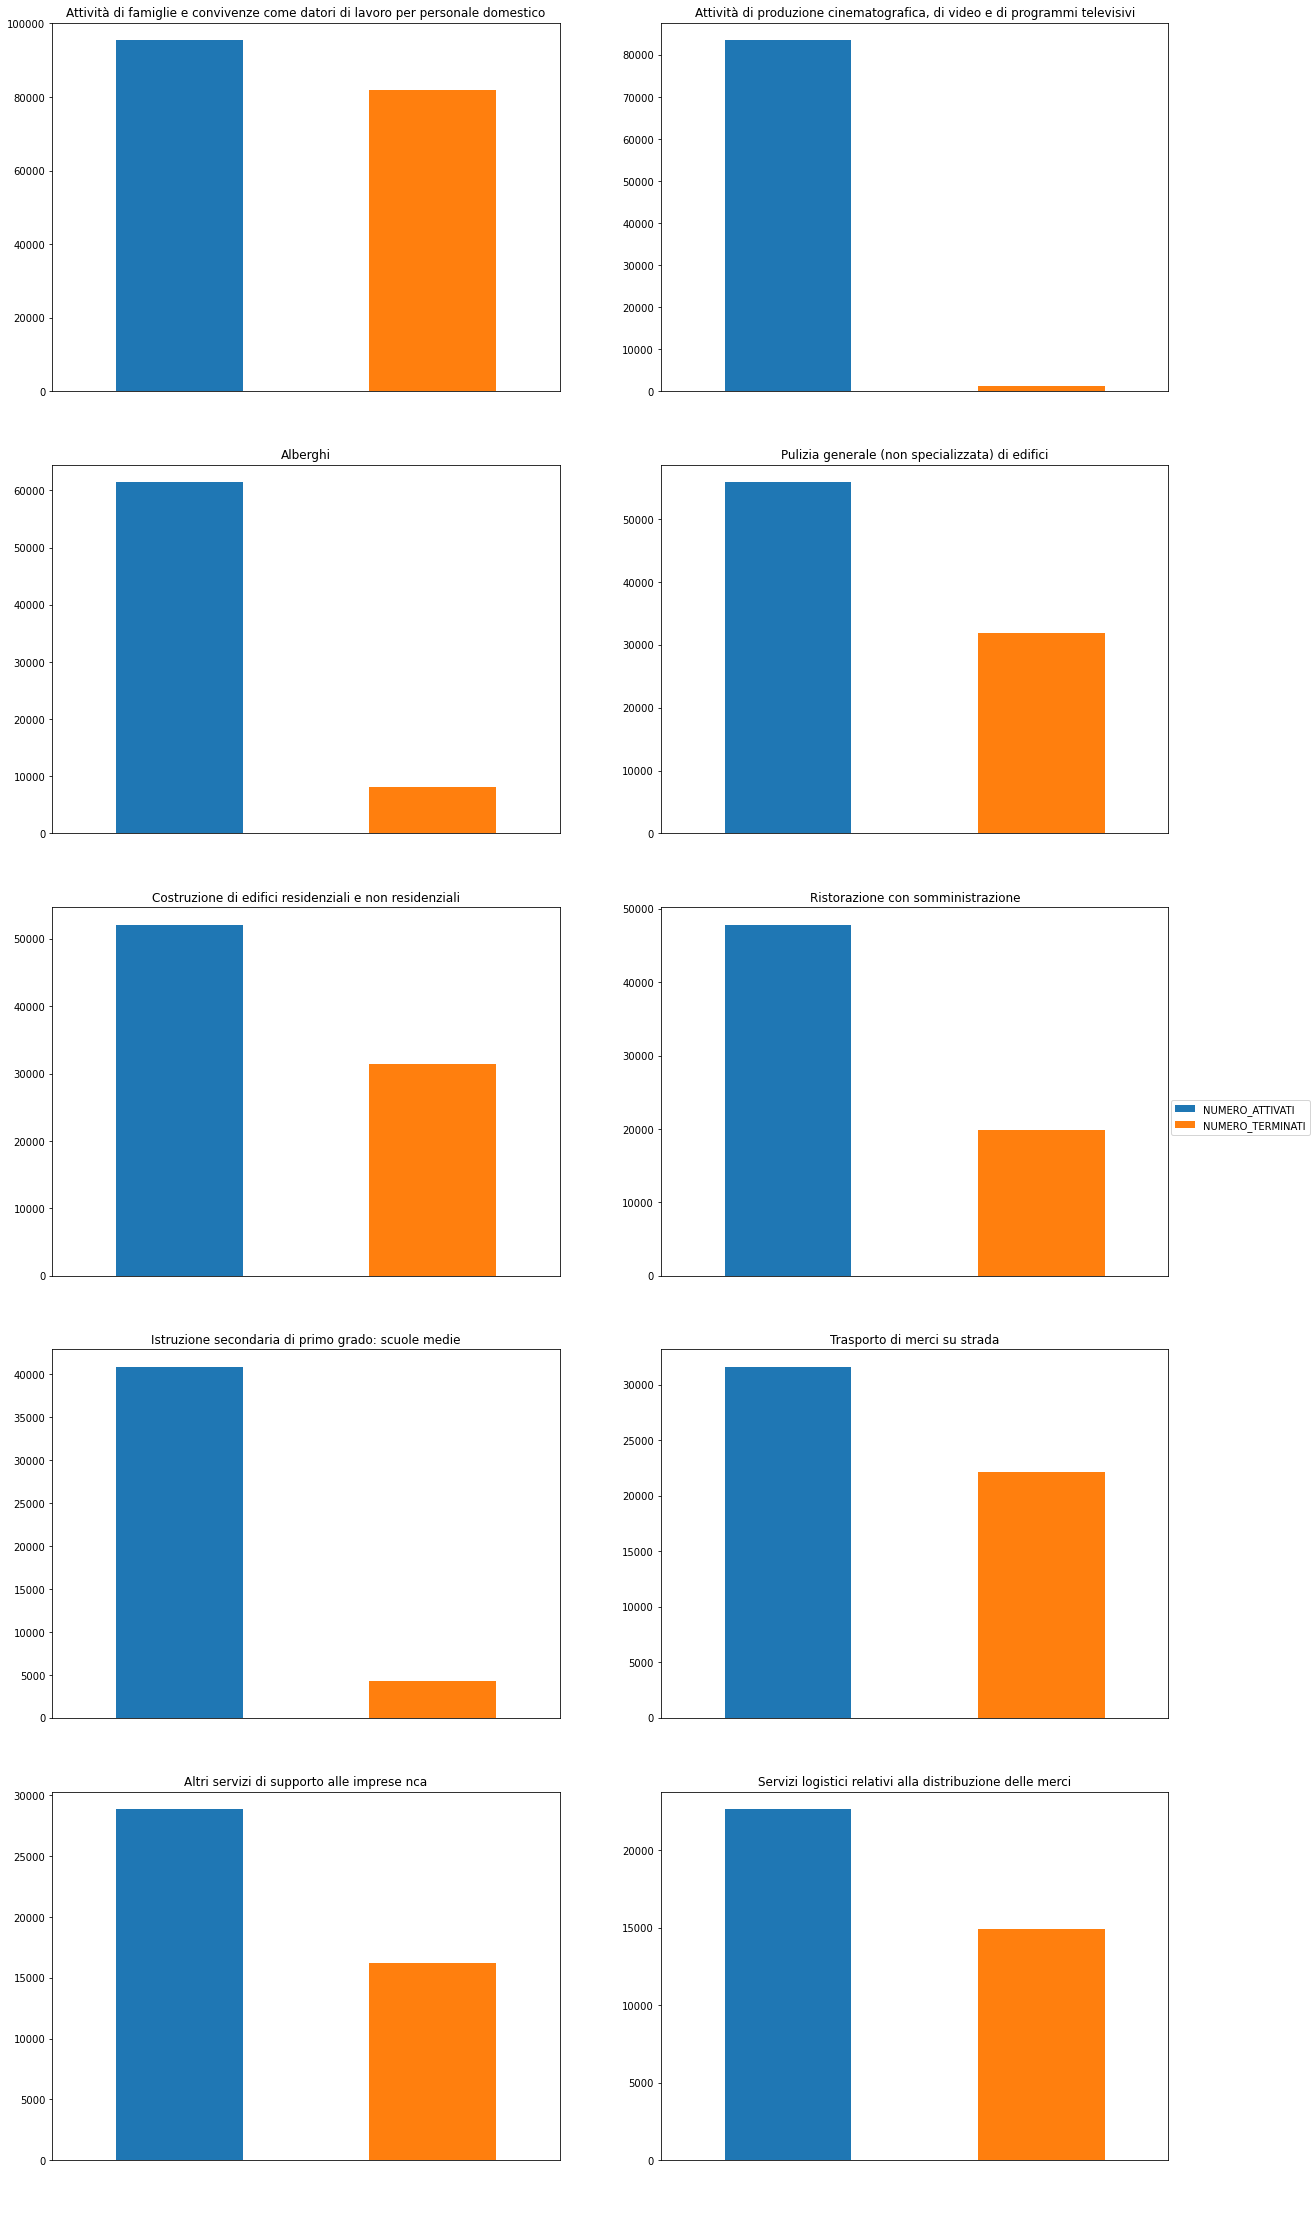

In [48]:
## Rappresentazione del dataframe sottoforma di istogrammi
df_settore_ecnomico = df_settore_ecnomico.set_index('SETTORE')
fig = plt.figure(figsize=(20,80))
for i, (name, row) in enumerate(df_settore_ecnomico.iterrows()):
    ax = plt.subplot(10,2, i+1)
    ax.set_title(row.name)
    ax.get_xaxis().set_visible(False)
    df_settore_ecnomico.iloc[i].plot.bar(color=['C0', 'C1'])
fig.legend(ax.bar([0,0],[0,0], color=['C0','C1']),['NUMERO_ATTIVATI','NUMERO_TERMINATI'], loc=5)

plt.show()

Abbiamo selezionato solo i 10 settori economici che hanno avuto più assunzioni negli ultimi 5 anni e siamo poi andati ad incrociare i dati con i licenziamenti.

Statisticamente si può dedurre che, globalmente, tutti i settori econoci hanno avuto un buon indice di crescita